In [ ]:
# pip install --upgrade palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels scikit-learn pyjanitor session-info
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [ ]:
pnr = palmerpenguins.load_penguins_raw()
pn = palmerpenguins.load_penguins()

In [ ]:
pn.head(3)

In [ ]:
pn.describe()

In [ ]:
pn.describe(include="all")

### Analizar Variables Categoricas y numericas por separado

In [ ]:
# Solo numericas
# pn.describe() # solo numericas por de fault
# para ser explicitos
pn.describe(include=[np.number])

In [ ]:
# Solo Categoricas
pn.describe(include=object)

In [ ]:
# Categorias de forma especifica
(
    pn
    .astype({
        "species": "category",
        "island": "category",
        "sex": "category"
    })
)

In [ ]:
(
    pn
    .astype({
        "species": "category",
        "island": "category",
        "sex": "category"
    })
    .describe(include=object)
)

In [ ]:
(
    pn
    .astype({
        "species": "category",
        "island": "category",
        "sex": "category"
    })
    .describe(include="category")
)
# Cuando se ponen como category pandas permite hacer mas cosas (pendientes por ver) (buscar en info y volver aqui a plasmarlo)

In [ ]:
(
    pn
    .species
    .value_counts()
    .plot(
        kind="bar"
    )
)

In [ ]:
sns.catplot(
    data=pn,
    x="species",
    kind="count",
    hue="species",
    palette=penguin_color
)

In [ ]:
(
    pn
    .value_counts("species", sort=True)
    .reset_index(name="count")
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x="species",
                y="count",
                hue="species",
                palette=penguin_color
            )
        )
    )
)

In [ ]:
(
    pn
    .assign(x="")
    .pipe(
        lambda df: (
             sns.displot(
                 data=df,
                 x="x",
                 hue="species",
                 multiple="fill",
                 palette=penguin_color
             )
        )
    )
)

In [ ]:
(
    pn
    .island
    .value_counts()
    .reset_index(name="count")
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x="island",
                y="count",
                hue="island"
            )
        )
    )
)

In [ ]:
sns.histplot(
    data=pn.assign(x=""),
    x="x",
    hue="island",
    multiple="fill"
)

In [ ]:
(
    pn
    .assign(x="")
    .pipe(
        lambda df: (
            sns.histplot(
                data=df,
                x="x",
                hue="island",
                multiple="fill"
            )
        )
    )
)

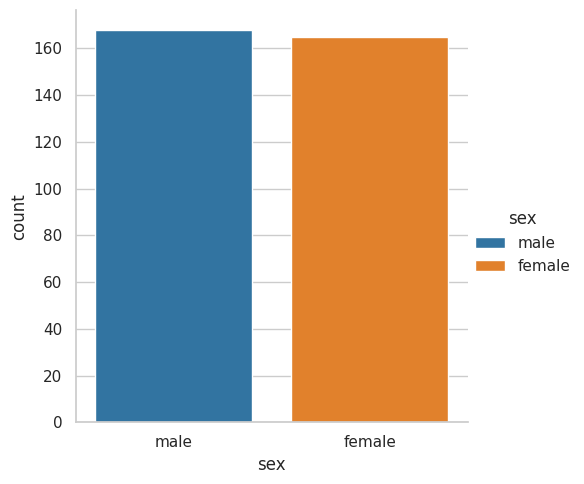

In [36]:
sns.catplot(
    data=pn,
    x="sex",
    kind="count",
    hue="sex"
)

<Axes: xlabel='x', ylabel='Count'>

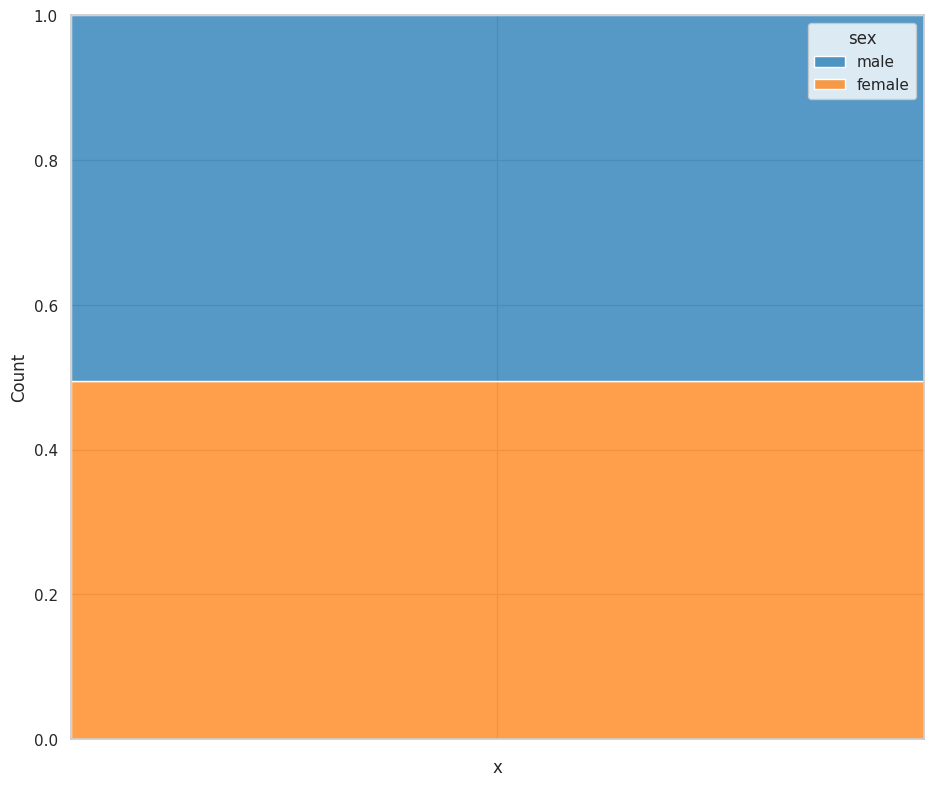

In [40]:
(
    pn
    .assign(x="")
    .pipe(
        lambda df: (
            sns.histplot(
                data=df,
                x="x",
                hue="sex",
                multiple="fill"
            )
        )
    )
)